Analysis starts with importing the dataset and evaluating the values.

In [4]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import numpy as np

In [5]:
df1 = pd.read_csv('Terry_Stops.csv')
df1.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,-,-,-,NaN,N,N,-,-,-


Checking for null values in each column.

In [6]:
df1.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               603
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

Evaluating column values to see if they should be kept, binned, or dropped.

In [7]:
df1['Subject Age Group'].value_counts()

26 - 35         15080
36 - 45          9582
18 - 25          9172
46 - 55          5867
56 and Above     2308
1 - 17           1931
-                1453
Name: Subject Age Group, dtype: int64

In [8]:
df1['Stop Resolution'].value_counts()

Field Contact               18321
Offense Report              15219
Arrest                      10948
Referred for Prosecution      728
Citation / Infraction         177
Name: Stop Resolution, dtype: int64

In [9]:
df1['Weapon Type'].value_counts()

None                                 32565
-                                    10186
Lethal Cutting Instrument             1482
Knife/Cutting/Stabbing Instrument      528
Handgun                                281
Firearm Other                          100
Blunt Object/Striking Implement         71
Club, Blackjack, Brass Knuckles         49
Firearm                                 34
Mace/Pepper Spray                       22
Other Firearm                           19
Firearm (unk type)                      15
Club                                     9
Taser/Stun Gun                           7
None/Not Applicable                      7
Rifle                                    7
Fire/Incendiary Device                   4
Shotgun                                  3
Automatic Handgun                        2
Brass Knuckles                           1
Blackjack                                1
Name: Weapon Type, dtype: int64

In [10]:
df1['Subject Perceived Race'].value_counts()

White                                        22177
Black or African American                    13520
Unknown                                       2437
-                                             1803
Hispanic                                      1684
Asian                                         1453
American Indian or Alaska Native              1314
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       44
Name: Subject Perceived Race, dtype: int64

In [11]:
df1['Subject Perceived Gender'].value_counts()

Male                                                         35515
Female                                                        9258
Unable to Determine                                            326
-                                                              269
Unknown                                                         21
Gender Diverse (gender non-conforming and/or transgender)        4
Name: Subject Perceived Gender, dtype: int64

In [12]:
df1['Officer ID'].value_counts()

7456      407
7634      341
7773      312
7765      306
7758      301
         ... 
5697        1
7558        1
5445        1
7563        1
5875        1
Name: Officer ID, Length: 1184, dtype: int64

In [13]:
df1['Officer YOB'].value_counts()

1986    3188
1987    2905
1984    2685
1991    2628
1985    2437
1992    2301
1990    2162
1988    2007
1989    1931
1982    1824
1983    1675
1979    1460
1981    1383
1993    1354
1971    1215
1978    1131
1995    1009
1976     991
1977     983
1973     903
1994     834
1980     790
1967     707
1968     623
1970     583
1974     551
1996     541
1969     532
1975     521
1962     453
1972     420
1965     415
1964     412
1997     345
1963     256
1966     223
1958     218
1961     209
1959     174
1960     161
1900      66
1954      44
1957      43
1953      32
1955      21
1956      17
1948      11
1952       9
1949       5
1998       2
1946       2
1951       1
Name: Officer YOB, dtype: int64

In [14]:
df1['Officer Gender'].value_counts()

M    40178
F     5186
N       29
Name: Officer Gender, dtype: int64

In [15]:
print("Counts \n \n", df1['Officer Race'].value_counts())
print("\n Percentage \n \n", df1['Officer Race'].value_counts(normalize = True))

Counts 
 
 White                            34480
Hispanic or Latino                2588
Two or More Races                 2527
Asian                             1900
Black or African American         1803
Not Specified                     1274
Nat Hawaiian/Oth Pac Islander      441
American Indian/Alaska Native      314
Unknown                             66
Name: Officer Race, dtype: int64

 Percentage 
 
 White                            0.759588
Hispanic or Latino               0.057013
Two or More Races                0.055669
Asian                            0.041857
Black or African American        0.039720
Not Specified                    0.028066
Nat Hawaiian/Oth Pac Islander    0.009715
American Indian/Alaska Native    0.006917
Unknown                          0.001454
Name: Officer Race, dtype: float64


In [16]:
df1['Initial Call Type'].value_counts()

-                                                 13073
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW         2983
SUSPICIOUS PERSON, VEHICLE OR INCIDENT             2856
DISTURBANCE, MISCELLANEOUS/OTHER                   2328
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)     1914
                                                  ...  
TRACKING ALARM                                        1
REQUEST TO WATCH                                      1
ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS         1
WARRANT PICKUP - FROM OTHER AGENCY                    1
MISSING - (ALZHEIMER, ENDANGERED, ELDERLY)            1
Name: Initial Call Type, Length: 166, dtype: int64

In [17]:
df1['Final Call Type'].value_counts()

-                                             13073
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON       3551
--PROWLER - TRESPASS                           3188
--DISTURBANCE - OTHER                          2589
--ASSAULTS, OTHER                              2205
                                              ...  
-ASSIGNED DUTY - STAKEOUT                         1
PROWLER                                           1
BIAS -RACIAL, POLITICAL, SEXUAL MOTIVATION        1
BURN - RECKLESS BURNING                           1
--PREMISE CHECKS - REQUEST TO WATCH               1
Name: Final Call Type, Length: 205, dtype: int64

In [18]:
df1['Call Type'].value_counts()

911                              20213
-                                13073
ONVIEW                            8631
TELEPHONE OTHER, NOT 911          3166
ALARM CALL (NOT POLICE ALARM)      302
TEXT MESSAGE                         7
SCHEDULED EVENT (RECURRING)          1
Name: Call Type, dtype: int64

In [19]:
df1['Officer Squad'].value_counts()

TRAINING - FIELD TRAINING SQUAD                        4803
WEST PCT 1ST W - DAVID/MARY                            1502
WEST PCT 2ND W - D/M RELIEF                             982
SOUTHWEST PCT 2ND W - FRANK                             917
NORTH PCT 2ND WATCH - NORTH BEATS                       885
                                                       ... 
RECORDS - DAY SHIFT                                       1
DV SQUAD D - ORDER SERVICE                                1
TRAINING - ADVANCED - SQUAD C                             1
COMMUNITY OUTREACH - YOUTH VIOLENCE -SCHOOLS DETAIL       1
COMM - INTERNET AND TELEPHONE REPORTING (ITRU)            1
Name: Officer Squad, Length: 169, dtype: int64

In [20]:
df1['Precinct'].value_counts()

West         10785
North         9993
-             9759
East          6001
South         5424
Southwest     2320
SouthWest      866
Unknown        200
OOJ             30
FK ERROR        15
Name: Precinct, dtype: int64

In [21]:
df1['Sector'].value_counts()

-         9957
E         2337
M         2270
N         2191
K         1762
B         1658
L         1639
K         1529
D         1512
R         1455
F         1378
S         1348
U         1302
O         1161
J         1119
G         1087
M         1074
C         1037
D         1001
Q          967
W          941
E          831
Q          666
N          610
O          525
F          518
R          505
S          431
B          419
U          392
G          391
J          350
W          348
C          317
L          312
99          53
Name: Sector, dtype: int64

In [22]:
df1['GO / SC Num'].value_counts()

20150000190790    16
20160000378750    16
20180000134604    14
20190000441736    13
20170000132836    13
                  ..
20150000003136     1
20180000479302     1
20200000255962     1
20200000239682     1
20180000071981     1
Name: GO / SC Num, Length: 35504, dtype: int64

In [23]:
df1['Subject ID'].value_counts()

-1              34718
 7726859935        19
 7753260438        13
 7727117712        12
 7726559999         9
                ...  
 7704469768         1
 7733768490         1
 7727685936         1
 9727654195         1
 16219707395        1
Name: Subject ID, Length: 8301, dtype: int64

In [24]:
df1['Terry Stop ID'].value_counts()

13080077761    3
15045077325    3
12686594000    2
17542218019    2
12105013403    2
              ..
13103094430    1
154270         1
269792         1
97455          1
131072         1
Name: Terry Stop ID, Length: 45368, dtype: int64

Dropping columns that do not seem important to the model or have messy data and turning this into a new dataframe.

In [25]:
df2 = df1.drop(['Beat', 'Sector', 'Precinct', 'Officer Squad', 'Call Type', 'Final Call Type', 'Initial Call Type',
                'GO / SC Num', 'Subject ID', 'Terry Stop ID'], axis=1)
df2.head()

,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,-,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,N,N
1,-,Field Contact,None,5670,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,N,N
2,-,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,N,-
3,-,Field Contact,None,7539,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,N,N
4,-,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,N,N


In [26]:
df2['Arrest Flag'].value_counts()

N    42653
Y     2740
Name: Arrest Flag, dtype: int64

In [27]:
df2['Frisk Flag'].value_counts()

N    34801
Y    10114
-      478
Name: Frisk Flag, dtype: int64

Dropping rows with '-' as a value for 'Frisk Flag', since someone can either be frisked or not.

In [28]:
df2.drop(df2.loc[df2['Frisk Flag']== '-'].index, inplace=True)
df2['Frisk Flag'].value_counts()

N    34801
Y    10114
Name: Frisk Flag, dtype: int64

For values that were '-', I am assuming that the race was unknown so I am changing these values so they can be combined with the previous 'Unknown' values.

In [30]:
df2['Subject Perceived Race'].value_counts()

White                                        21966
Black or African American                    13395
Unknown                                       2417
-                                             1741
Hispanic                                      1667
Asian                                         1442
American Indian or Alaska Native              1298
Multi-Racial                                   796
Other                                          149
Native Hawaiian or Other Pacific Islander       44
Name: Subject Perceived Race, dtype: int64

In [31]:
df2['Subject Perceived Race'].replace({'-': 'Unknown'}, inplace=True)
df2['Subject Perceived Race'].value_counts()

White                                        21966
Black or African American                    13395
Unknown                                       4158
Hispanic                                      1667
Asian                                         1442
American Indian or Alaska Native              1298
Multi-Racial                                   796
Other                                          149
Native Hawaiian or Other Pacific Islander       44
Name: Subject Perceived Race, dtype: int64

Similarly to race, I am changing '-' and 'Unable to Determine' to 'Unknown'.

In [32]:
df2['Subject Perceived Gender'].value_counts()

Male                                                         35180
Female                                                        9173
Unable to Determine                                            317
-                                                              220
Unknown                                                         21
Gender Diverse (gender non-conforming and/or transgender)        4
Name: Subject Perceived Gender, dtype: int64

In [33]:
df2['Subject Perceived Gender'].replace({'-': 'Unknown', 'Unable to Determine': 'Unknown'}, inplace=True)
df2['Subject Perceived Gender'].value_counts()

Male                                                         35180
Female                                                        9173
Unknown                                                        558
Gender Diverse (gender non-conforming and/or transgender)        4
Name: Subject Perceived Gender, dtype: int64

Applying the same adjustments to the 'Officer Race' column.

In [34]:
df2['Officer Race'].value_counts()

White                            34126
Hispanic or Latino                2569
Two or More Races                 2513
Asian                             1883
Black or African American         1765
Not Specified                     1259
Nat Hawaiian/Oth Pac Islander      433
American Indian/Alaska Native      301
Unknown                             66
Name: Officer Race, dtype: int64

In [35]:
df2['Officer Race'].replace({'Not Specified': 'Unknown'}, inplace=True)
df2['Officer Race'].value_counts()

White                            34126
Hispanic or Latino                2569
Two or More Races                 2513
Asian                             1883
Black or African American         1765
Unknown                           1325
Nat Hawaiian/Oth Pac Islander      433
American Indian/Alaska Native      301
Name: Officer Race, dtype: int64

Because having a value of '-' may cause Syntax and TypeErrors, I changed this to be 'Unknown'

In [36]:
df2['Subject Age Group'].value_counts()

26 - 35         14950
36 - 45          9506
18 - 25          9083
46 - 55          5807
56 and Above     2289
1 - 17           1910
-                1370
Name: Subject Age Group, dtype: int64

In [37]:
df2['Subject Age Group'].replace({'-': 'Unknown'}, inplace=True)
df2['Subject Age Group'].value_counts()

26 - 35         14950
36 - 45          9506
18 - 25          9083
46 - 55          5807
56 and Above     2289
1 - 17           1910
Unknown          1370
Name: Subject Age Group, dtype: int64

Because Officer's year of birth were all over the place, and had some outliers, I manually binned these to 10 year periods.

In [38]:
df2['Officer YOB'].value_counts()

1986    3174
1987    2882
1984    2668
1991    2622
1985    2413
1992    2286
1990    2145
1988    1995
1989    1925
1982    1809
1983    1663
1979    1444
1981    1356
1993    1352
1971    1198
1978    1095
1976     986
1995     985
1977     926
1973     896
1994     818
1980     785
1967     697
1968     619
1970     579
1974     540
1996     540
1969     523
1975     515
1962     444
1972     417
1965     414
1964     402
1997     345
1963     250
1958     216
1961     208
1966     203
1959     172
1960     159
1900      66
1954      44
1957      42
1953      30
1955      20
1956      17
1948      11
1952       9
1949       5
1998       2
1946       2
1951       1
Name: Officer YOB, dtype: int64

In [41]:
df2['Officer YOB'].replace({1990: '1990s', 1991: '1990s', 1992: '1990s', 1993: '1990s', 1994: '1990s',
                            1995: '1990s', 1996: '1990s', 1997: '1990s', 1998: '1990s', 1999: '1990s'}, inplace=True)
df2['Officer YOB'].value_counts()

1990s    11095
1986      3174
1987      2882
1984      2668
1985      2413
1988      1995
1989      1925
1982      1809
1983      1663
1979      1444
1981      1356
1971      1198
1978      1095
1976       986
1977       926
1973       896
1980       785
1967       697
1968       619
1970       579
1974       540
1969       523
1975       515
1962       444
1972       417
1965       414
1964       402
1963       250
1958       216
1961       208
1966       203
1959       172
1960       159
1900        66
1954        44
1957        42
1953        30
1955        20
1956        17
1948        11
1952         9
1949         5
1946         2
1951         1
Name: Officer YOB, dtype: int64

In [42]:
df2['Officer YOB'].replace({1980: '1980s', 1981: '1980s', 1982: '1980s', 1983: '1980s', 1984: '1980s',
                            1985: '1980s', 1986: '1980s', 1987: '1980s', 1988: '1980s', 1989: '1980s'}, inplace=True)
df2['Officer YOB'].value_counts()

1980s    20670
1990s    11095
1979      1444
1971      1198
1978      1095
1976       986
1977       926
1973       896
1967       697
1968       619
1970       579
1974       540
1969       523
1975       515
1962       444
1972       417
1965       414
1964       402
1963       250
1958       216
1961       208
1966       203
1959       172
1960       159
1900        66
1954        44
1957        42
1953        30
1955        20
1956        17
1948        11
1952         9
1949         5
1946         2
1951         1
Name: Officer YOB, dtype: int64

In [43]:
df2['Officer YOB'].replace({1970: '1970s', 1971: '1970s', 1972: '1970s', 1973: '1970s', 1974: '1970s',
                            1975: '1970s', 1976: '1970s', 1977: '1970s', 1978: '1970s', 1979: '1970s'}, inplace=True)
df2['Officer YOB'].value_counts()

1980s    20670
1990s    11095
1970s     8596
1967       697
1968       619
1969       523
1962       444
1965       414
1964       402
1963       250
1958       216
1961       208
1966       203
1959       172
1960       159
1900        66
1954        44
1957        42
1953        30
1955        20
1956        17
1948        11
1952         9
1949         5
1946         2
1951         1
Name: Officer YOB, dtype: int64

In [44]:
df2['Officer YOB'].replace({1960: '1960s', 1961: '1960s', 1962: '1960s', 1963: '1960s', 1964: '1960s',
                            1965: '1960s', 1966: '1960s', 1967: '1960s', 1968: '1960s', 1969: '1960s'}, inplace=True)
df2['Officer YOB'].value_counts()

1980s    20670
1990s    11095
1970s     8596
1960s     3919
1958       216
1959       172
1900        66
1954        44
1957        42
1953        30
1955        20
1956        17
1948        11
1952         9
1949         5
1946         2
1951         1
Name: Officer YOB, dtype: int64

In [45]:
df2['Officer YOB'].replace({1950: '1950s', 1951: '1950s', 1952: '1950s', 1953: '1950s', 1954: '1950s',
                            1955: '1950s', 1956: '1950s', 1957: '1950s', 1958: '1950s', 1959: '1950s'}, inplace=True)
df2['Officer YOB'].value_counts()

1980s    20670
1990s    11095
1970s     8596
1960s     3919
1950s      551
1900        66
1948        11
1949         5
1946         2
Name: Officer YOB, dtype: int64

In [46]:
df2['Officer YOB'].replace({1940: '1940s', 1941: '1940s', 1942: '1940s', 1943: '1940s', 1944: '1940s',
                            1945: '1940s', 1946: '1940s', 1947: '1940s', 1948: '1940s', 1949: '1940s'}, inplace=True)
df2['Officer YOB'].value_counts()

1980s    20670
1990s    11095
1970s     8596
1960s     3919
1950s      551
1900        66
1940s       18
Name: Officer YOB, dtype: int64

In [47]:
df2.drop(df2.loc[df2['Officer YOB']== 1900].index, inplace=True)
df2['Officer YOB'].value_counts()

1980s    20670
1990s    11095
1970s     8596
1960s     3919
1950s      551
1940s       18
Name: Officer YOB, dtype: int64

The final, cleaned up dataframe for the preliminary models.

In [48]:
df2

,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,Unknown,Arrest,None,7500,1980s,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,N,N
1,Unknown,Field Contact,None,5670,1960s,M,White,Unknown,Unknown,2015-03-19T00:00:00,07:59:00,N,N
3,Unknown,Field Contact,None,7539,1960s,M,White,Unknown,Unknown,2015-04-01T00:00:00,04:55:00,N,N
4,Unknown,Field Contact,None,6973,1970s,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,N,N
5,Unknown,Field Contact,None,7402,1970s,M,White,Black or African American,Male,2015-04-05T00:00:00,23:46:00,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45388,56 and Above,Field Contact,-,8668,1990s,F,White,White,Male,2020-11-24T00:00:00,16:38:00,N,N
45389,56 and Above,Field Contact,-,8747,1990s,M,White,Unknown,Male,2020-11-25T00:00:00,11:16:36,N,N
45390,56 and Above,Field Contact,-,7456,1970s,M,White,White,Male,2020-12-03T00:00:00,18:25:31,N,N
45391,56 and Above,Field Contact,Knife/Cutting/Stabbing Instrument,8646,1990s,M,White,Black or African American,Male,2020-12-15T00:00:00,23:02:58,N,Y


In [49]:
df2['Arrest Flag'].value_counts()

N    42114
Y     2735
Name: Arrest Flag, dtype: int64

In [50]:
df2['Frisk Flag'].value_counts()

N    34745
Y    10104
Name: Frisk Flag, dtype: int64

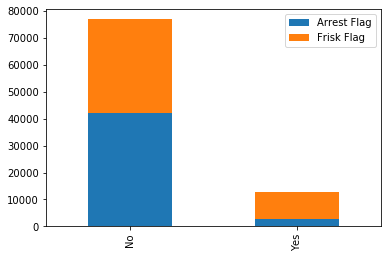

In [66]:
Arrest = [42114, 2735]
Frisk = [34745, 10104]
index = ['No', 'Yes']
df3 = pd.DataFrame({'Arrest Flag': Arrest,
                   'Frisk Flag': Frisk}, index=index)
ax3 = df3.plot.bar(stacked=True)


In [ ]:
df2.to_csv(r'C:\Users\melfr\Documents\Flatiron\p3\phase_project\terry_analysis\FriskAnalysis\EDA_df.csv')